ADDING EXTRA VARIABLES

In [1]:
import pandas as pd
df_if=pd.read_csv("/content/TMT_12MM_IF_Route.csv",index_col=False)
df_bf=pd.read_csv("/content/TMT_12MM_BF_Route.csv",index_col=False)

In [2]:
print(df_if.head())

        Date  Price 
0  5/30/2020   36300
1   6/1/2020   36600
2   6/2/2020   37100
3   6/3/2020   37100
4   6/4/2020   36700


In [3]:
print(df_bf.head())


        Date  Price 
0  5/30/2020   38200
1   6/6/2020   37700
2  6/13/2020   37000
3  6/20/2020   36500
4  6/27/2020   36500


In [4]:
df_if.columns
df_bf.columns

Index(['Date', 'Price '], dtype='object')

In [5]:
# Convert 'Date' to datetime
df_if['Date'] = pd.to_datetime(df_if['Date'])
df_bf['Date'] = pd.to_datetime(df_bf['Date'])


In [6]:
# Rename for merging
df_if.rename(columns={'Price ': 'TMT_IF_Price','Date':'IF_Date'},inplace=True)
df_bf.rename(columns={'Price ': 'TMT_BF_Price','Date':'BF_Date'},inplace=True)

In [7]:
print(df_if.head())

     IF_Date  TMT_IF_Price
0 2020-05-30         36300
1 2020-06-01         36600
2 2020-06-02         37100
3 2020-06-03         37100
4 2020-06-04         36700


In [8]:
print(df_bf.head())

     BF_Date  TMT_BF_Price
0 2020-05-30         38200
1 2020-06-06         37700
2 2020-06-13         37000
3 2020-06-20         36500
4 2020-06-27         36500


In [10]:
df_Coal=pd.read_csv('/content/Coal_Non_Coking_Portside_Ex-Gangavaram_India_RB2_5500_NAR_S_Africa.csv',index_col=False)
df_Ingot=pd.read_csv('/content/Ingot_DAP-Mandi_Gobindgarh_India_3_5_x_4_5_Inch_IS_2830.csv',index_col=False)
df_Iron_Ore_Chattisgarh=pd.read_csv('/content/Iron_Ore_Fines_NMDC_Chattisgarh_India_0_-10_mm_Fe_64.csv',index_col=False)
df_Iron_Ore_Bolani=pd.read_csv('/content/Iron_Ore_Fines_SAIL_Bolani_Odisha_0-5_mm_Fe_62_5.csv',index_col=False)
df_Scrap_Durgapur=pd.read_csv('/content/Melting_Scrap_DAP-Durgapur_India_Thickness_2_ndash_6_mm_-_Size_up_to_1_5_feet_End_Cutting.csv',index_col=False)
df_Scrap_Mandi=pd.read_csv('/content/Melting_Scrap_DAP-Mandi_Gobindgarh_India_End_Cutting.csv',index_col=False)
df_Sponge_Iron_DRCLO=pd.read_csv('/content/Sponge_Iron_DRCLO_Exw-Raipur_India_Mix_FeM_82_--1.csv',index_col=False)
df_Sponge_Iron_PDRI=pd.read_csv('/content/Sponge_Iron_PDRI_Exw-Raipur_India_Lumps_FeM_80_--1.csv',index_col=False)
df_Thermal_Coal=pd.read_csv('/content/Thermal_coal.csv',index_col=False)



In [11]:
import pandas as pd

# Step 1: Load the Excel sheet
df_if_merged = pd.read_excel("/content/MERGED_IF_DATA(1).xlsx")

# Step 2: Fill missing values for all columns except 'IF_Price'
cols_to_fill = df_if_merged.columns.difference(['IF_Price'])

# First forward fill
df_if_merged[cols_to_fill] = df_if_merged[cols_to_fill].fillna(method='ffill')

# Then backward fill
df_if_merged[cols_to_fill] = df_if_merged[cols_to_fill].fillna(method='bfill')

# Drop rows where 'Price' is NaN
df_if_merged.dropna(subset=['IF_Price'], inplace=True)

df_if_merged.shape

# Optional: Check how many missing values remain
print("Missing values after fill:\n", df_if_merged.isnull().sum())

# Step 3: Save to new Excel file
print("Missing values after fill:\n", df_if_merged.isnull().sum())

# Step 3: Save to Excel
df_if_merged.to_excel("/content/MERGED_IF_CLEAN_DATA(1).xlsx", index=False)

/tmp/ipython-input-11-669160815.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_if_merged[cols_to_fill] = df_if_merged[cols_to_fill].fillna(method='ffill')
/tmp/ipython-input-11-669160815.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_if_merged[cols_to_fill] = df_if_merged[cols_to_fill].fillna(method='bfill')


Missing values after fill:
 Date                          0
IF_Price                      0
Coal_Price                    0
Ingot_Price                   0
Scrap_Mandi_Price             0
Scrap_Durgapur_Price          0
Sponge_Iron_PDRI_Price        0
Sponge_Iron_DRCLO_Price       0
Iron_Ore_Chattisgarh_Price    0
Iron_Ore_Bolani_Price         0
Thermal_Coal_Price            0
dtype: int64
Missing values after fill:
 Date                          0
IF_Price                      0
Coal_Price                    0
Ingot_Price                   0
Scrap_Mandi_Price             0
Scrap_Durgapur_Price          0
Sponge_Iron_PDRI_Price        0
Sponge_Iron_DRCLO_Price       0
Iron_Ore_Chattisgarh_Price    0
Iron_Ore_Bolani_Price         0
Thermal_Coal_Price            0
dtype: int64


In [12]:
from google.colab import files
files.download("/content/MERGED_IF_CLEAN_DATA(1).xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
#Step 1: Load the Excel sheet
df_bf_merged = pd.read_excel("/content/MERGED_BF_DATA(1).xlsx")

# Step 2: Fill missing values for all columns except 'IF_Price'
cols_to_fill = df_bf_merged.columns.difference(['BF_Price'])

# First forward fill
df_bf_merged[cols_to_fill] = df_bf_merged[cols_to_fill].fillna(method='ffill')

# Then backward fill
df_bf_merged[cols_to_fill] = df_bf_merged[cols_to_fill].fillna(method='bfill')

# Drop rows where 'Price' is NaN
df_bf_merged.dropna(subset=['BF_Price'], inplace=True)

df_bf_merged.shape

# Optional: Check how many missing values remain
print("Missing values after fill:\n", df_bf_merged.isnull().sum())

# Step 3: Save to new Excel file
print("Missing values after fill:\n", df_bf_merged.isnull().sum())

# Step 3: Save to Excel
df_bf_merged.to_excel("/content/MERGED_BF_CLEAN_DATA(1).xlsx", index=False)

Missing values after fill:
 Date                          0
BF_Price                      0
Coal_Price                    0
Ingot_Price                   0
Iron_Ore_Bolani_Price         0
Iron_Ore_Chattisgarh_Price    0
Sponge_Iron_DRCLO_Price       0
Sponge_Iron_PDRI_Price        0
Scrap_Mandi_Price             0
Scrap_Mandi_Durgapur_Price    0
Thermal_Coal_Price            0
dtype: int64
Missing values after fill:
 Date                          0
BF_Price                      0
Coal_Price                    0
Ingot_Price                   0
Iron_Ore_Bolani_Price         0
Iron_Ore_Chattisgarh_Price    0
Sponge_Iron_DRCLO_Price       0
Sponge_Iron_PDRI_Price        0
Scrap_Mandi_Price             0
Scrap_Mandi_Durgapur_Price    0
Thermal_Coal_Price            0
dtype: int64


/tmp/ipython-input-13-791807932.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_bf_merged[cols_to_fill] = df_bf_merged[cols_to_fill].fillna(method='ffill')
/tmp/ipython-input-13-791807932.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_bf_merged[cols_to_fill] = df_bf_merged[cols_to_fill].fillna(method='bfill')


In [ ]:
from google.colab import files
files.download("/content/MERGED_BF_CLEAN_DATA(1).xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

CORRELATION CALCULATION

In [14]:
import pandas as pd


df_if_merged = pd.read_csv("/content/MERGED_IF_CLEAN_DATA(1).csv")
correlation_with_target = df_if_merged.corr(numeric_only=True)['IF_Price'].sort_values(ascending=False)

# Print all correlations
print("Correlation of all variables with TMT IF Price:\n")
print(correlation_with_target)

# Optional: Filter high correlation (threshold > 0.9)
print("\nHighly Correlated Variables (correlation > 0.9):\n")
print(correlation_with_target[correlation_with_target > 0.9])

Correlation of all variables with TMT IF Price:

IF_Price                      1.000000
Scrap_Mandi_Price             0.965501
Sponge_Iron_DRCLO_Price       0.950870
Sponge_Iron_PDRI_Price        0.932645
Ingot_Price                   0.869884
Coal_Price                    0.840161
Thermal_Coal_Price            0.840161
Iron_Ore_Bolani_Price         0.081921
Scrap_Durgapur_Price          0.008398
Iron_Ore_Chattisgarh_Price   -0.248804
Name: IF_Price, dtype: float64

Highly Correlated Variables (correlation > 0.9):

IF_Price                   1.000000
Scrap_Mandi_Price          0.965501
Sponge_Iron_DRCLO_Price    0.950870
Sponge_Iron_PDRI_Price     0.932645
Name: IF_Price, dtype: float64


In [15]:
import pandas as pd


df_bf_merged = pd.read_csv("/content/MERGED_BF_CLEAN_DATA(1).csv")
correlation_with_target = df_bf_merged.corr(numeric_only=True)['BF_Price'].sort_values(ascending=False)

# Print all correlations
print("Correlation of all variables with TMT BF Price:\n")
print(correlation_with_target)

# Optional: Filter high correlation (threshold > 0.8)
print("\nHighly Correlated Variables (correlation > 0.8):\n")
print(correlation_with_target[correlation_with_target > 0.8])



Correlation of all variables with TMT BF Price:

BF_Price                      1.000000
Scrap_Mandi_Price             0.885420
Sponge_Iron_DRCLO_Price       0.882816
Sponge_Iron_PDRI_Price        0.861774
Coal_Price                    0.746386
Thermal_Coal_Price            0.746386
Ingot_Price                   0.738466
Iron_Ore_Bolani_Price         0.068581
Scrap_Durgapur_Price         -0.040266
Iron_Ore_Chattisgarh_Price   -0.117973
Name: BF_Price, dtype: float64

Highly Correlated Variables (correlation > 0.8):

BF_Price                   1.000000
Scrap_Mandi_Price          0.885420
Sponge_Iron_DRCLO_Price    0.882816
Sponge_Iron_PDRI_Price     0.861774
Name: BF_Price, dtype: float64


valuable variables are


*   Scrap_Mandi
*   Sponge_Iron_DRCLO
*   Sponge_Iron_PDRI











In [16]:
# Define the columns to drop
columns_to_drop = [
    'Iron_Ore_Chattisgarh_Price',
    'Iron_Ore_Bolani_Price',
    'Scrap_Durgapur_Price',
    'Coal_Price',
    'Ingot_Price',
    'Thermal_Coal_Price'
]

# Drop the columns from the BF dataset
df_bf_merged = df_bf_merged.drop(columns=columns_to_drop, errors='ignore')

# Drop the columns from the IF dataset
df_if_merged = df_if_merged.drop(columns=columns_to_drop, errors='ignore')

print("Columns dropped from df_bf_merged:")
print(columns_to_drop)
print("\nRemaining columns in df_bf_merged:")
print(df_bf_merged.columns.tolist())

print("\nColumns dropped from df_if_merged:")
print(columns_to_drop)
print("\nRemaining columns in df_if_merged:")
print(df_if_merged.columns.tolist())

Columns dropped from df_bf_merged:
['Iron_Ore_Chattisgarh_Price', 'Iron_Ore_Bolani_Price', 'Scrap_Durgapur_Price', 'Coal_Price', 'Ingot_Price', 'Thermal_Coal_Price']

Remaining columns in df_bf_merged:
['Date', 'BF_Price', 'Sponge_Iron_DRCLO_Price', 'Sponge_Iron_PDRI_Price', 'Scrap_Mandi_Price']

Columns dropped from df_if_merged:
['Iron_Ore_Chattisgarh_Price', 'Iron_Ore_Bolani_Price', 'Scrap_Durgapur_Price', 'Coal_Price', 'Ingot_Price', 'Thermal_Coal_Price']

Remaining columns in df_if_merged:
['Date', 'IF_Price', 'Scrap_Mandi_Price', 'Sponge_Iron_PDRI_Price', 'Sponge_Iron_DRCLO_Price']


MODEL FITTING AND PREDICTION and PLOT PREDICTION PLOT


RANDOM FOREST REGRESSOR

In [17]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
import matplotlib.pyplot as plt

# STEP 1: Prepare Data
df = df_bf_merged.copy()
df.columns = df.columns.str.strip()
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date').reset_index(drop=True)

# STEP 2: Feature Engineering (Lag + Rolling)
df['Lag1'] = df['BF_Price'].shift(1)
df['Lag2'] = df['BF_Price'].shift(2)
df['Rolling7'] = df['BF_Price'].rolling(window=7).mean()
df['Month'] = df['Date'].dt.month
df['Weekday'] = df['Date'].dt.weekday

# Drop initial NaN rows
df.dropna(inplace=True)

# STEP 3: Define Features and Target
features = ['Scrap_Mandi_Price',
            'Sponge_Iron_DRCLO_Price', 'Sponge_Iron_PDRI_Price',
            'Lag1', 'Lag2', 'Rolling7', 'Month', 'Weekday']

X = df[features]
y = df['BF_Price']

# STEP 4: TimeSeriesSplit and Grid Search
tscv = TimeSeriesSplit(n_splits=5)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
}

model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(model, param_grid, cv=tscv, scoring='neg_mean_absolute_error')
grid_search.fit(X, y)

best_model = grid_search.best_estimator_

# STEP 5: Train-Test Split (last 30% as test set)
split_index = int(len(df) * 0.7)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

# STEP 6: Train Best Model
best_model.fit(X_train, y_train)
pred_bf = best_model.predict(X_test)

# STEP 7: Evaluation
mae = mean_absolute_error(y_test, pred_bf)
rmse = np.sqrt(mean_squared_error(y_test, pred_bf))
r2 = r2_score(y_test, pred_bf)

print("Final Model Evaluation:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


Final Model Evaluation:
MAE: 569.78
RMSE: 784.72
R² Score: 0.9057


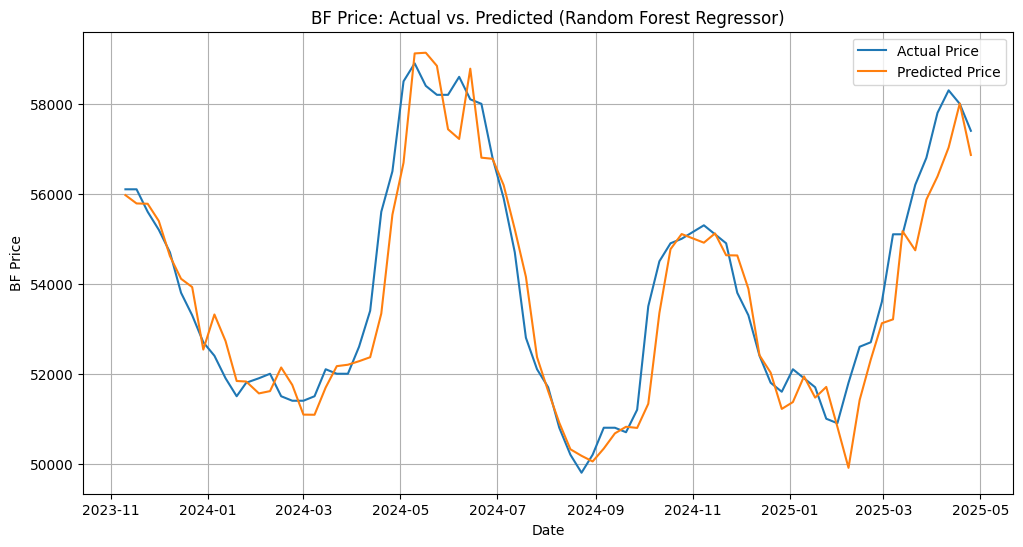

In [18]:
import matplotlib.pyplot as plt
# STEP 8: Plotting
plt.figure(figsize=(12, 6))
plt.plot(df['Date'].iloc[split_index:], y_test, label='Actual Price')
plt.plot(df['Date'].iloc[split_index:], pred_bf, label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('BF Price')
plt.title('BF Price: Actual vs. Predicted (Random Forest Regressor)')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
import matplotlib.pyplot as plt

# STEP 1: Prepare Data
df1 = df_if_merged.copy()
df1.columns = df1.columns.str.strip()
df1['Date'] = pd.to_datetime(df1['Date'])
df1 = df1.sort_values('Date').reset_index(drop=True)

# STEP 2: Feature Engineering (Lag + Rolling)
df1['Lag1'] = df1['IF_Price'].shift(1)
df1['Lag2'] = df1['IF_Price'].shift(2)
df1['Rolling7'] = df1['IF_Price'].rolling(window=7).mean()
df1['Month'] = df1['Date'].dt.month
df1['Weekday'] = df1['Date'].dt.weekday

# Drop initial NaN rows
df1.dropna(inplace=True)

# STEP 3: Define Features and Target
features = ['Scrap_Mandi_Price',
            'Sponge_Iron_DRCLO_Price', 'Sponge_Iron_PDRI_Price',
            'Lag1', 'Lag2', 'Rolling7', 'Month', 'Weekday']

X = df1[features]
y = df1['IF_Price']

# STEP 4: TimeSeriesSplit and Grid Search
tscv = TimeSeriesSplit(n_splits=5)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
}

model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(model, param_grid, cv=tscv, scoring='neg_mean_absolute_error')
grid_search.fit(X, y)

best_model = grid_search.best_estimator_

# STEP 5: Train-Test Split (last 30% as test set)
split_index = int(len(df1) * 0.7)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

# STEP 6: Train Best Model
best_model.fit(X_train, y_train)
pred_if = best_model.predict(X_test)

# STEP 7: Evaluation
mae = mean_absolute_error(y_test, pred_if)
rmse = np.sqrt(mean_squared_error(y_test, pred_if))
r2 = r2_score(y_test, pred_if)

print("Final Model Evaluation:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


Final Model Evaluation:
MAE: 264.06
RMSE: 355.41
R² Score: 0.9655


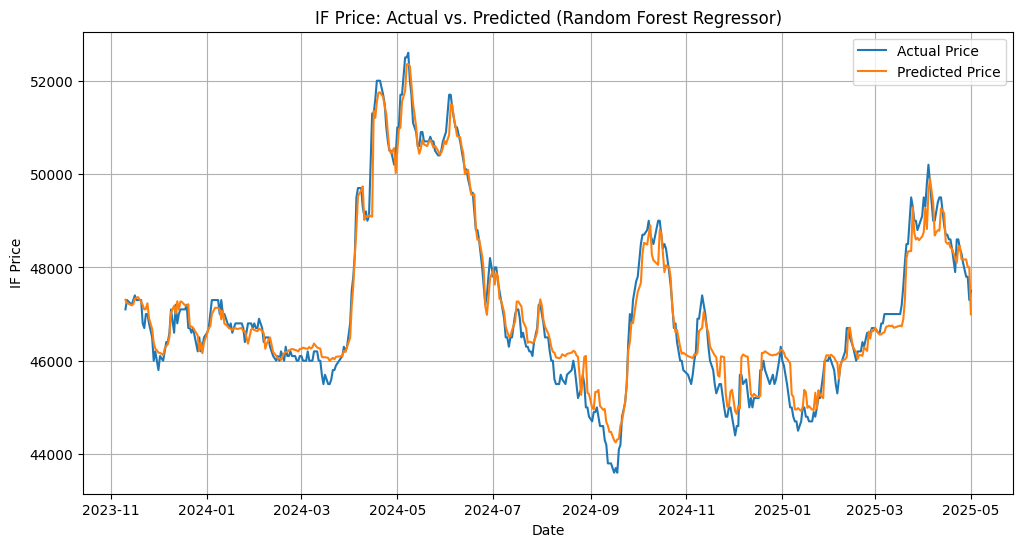

In [20]:
import matplotlib.pyplot as plt
# STEP 8: Plotting
plt.figure(figsize=(12, 6))
plt.plot(df1['Date'].iloc[split_index:], y_test, label='Actual Price')
plt.plot(df1['Date'].iloc[split_index:], pred_if, label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('IF Price')
plt.title('IF Price: Actual vs. Predicted (Random Forest Regressor)')
plt.legend()
plt.grid(True)
plt.show()